# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Syifa Gusriani Rohman
- **Email:** syifagusriani08@gmail.com
- **ID Dicoding:** syifag

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh suhu (temperature), kelembapan (humidity), dan kecepatan angin (windspeed) memengaruhi jumlah penyewaan sepeda?
2. Apakah terdapat perbedaan jumlah penyewaan sepeda berdasarkan musim (spring, summer, fall, winter)?
3. Bagaimana perbedaan pola penggunaan antara pengguna casual dan registered?
4. Apakah distribusi penyewaan sepeda merata sepanjang tahun atau ada bulan-bulan tertentu dengan permintaan rendah?
5. Kapan waktu (jam) paling sering dan jarang terjadi transaksi penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

## Data Wrangling

### Gathering Data

In [2]:
bs_day_df = pd.read_csv('https://raw.githubusercontent.com/syifagusriani/pad-assets/refs/heads/main/day.csv')
bs_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
bs_hour_df = pd.read_csv('https://raw.githubusercontent.com/syifagusriani/pad-assets/refs/heads/main/hour.csv')
bs_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada line pertama, dengan bantuan library pandas, membaca file csv yang terdapat dalam url tersebut dan diubah menjadi pandas DataFrame.
- Pada line kedua, menampilkan 5 baris pertama dari DataFrame bs_day_df dan bs_hour_df.
- Data berhasil terbaca dan ditampilkan.

### Assessing Data

In [4]:
bs_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
bs_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
print("Jumlah duplikasi dataset day: ", bs_day_df.duplicated().sum())
print("Jumlah duplikasi dataset hour: ", bs_hour_df.duplicated().sum())

Jumlah duplikasi dataset day:  0
Jumlah duplikasi dataset hour:  0


**Insight:**
- Saat di cek lebih lanjut dengan code info(), baik itu dataset day maupun hour, anomali yang ditemukan adalah tipe data dteday yang seharusnya datetime, tapi disana tertulis object.
- Untuk pengecekan data duplikasi, tidak terdapat data duplikasi pada dataset.

### Cleaning Data

In [7]:
bs_day_df['dteday'] = pd.to_datetime(bs_day_df['dteday'])
bs_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [8]:
bs_hour_df['dteday'] = pd.to_datetime(bs_hour_df['dteday'])
bs_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Karena permasalahan pada data bs_day_df dan bs_hour_df adalah kesalahan tipe data, maka dilakukan perbaikan dengan mengganti tipe data object menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore bs_day_df

In [9]:
print ("Pengelompokan Jumlah Penyewaan Berdasarkan Tahun")
year_dict = {0:2011, 1:2012}
total_year = (bs_day_df.groupby('yr')['cnt'].sum()).rename_axis("Tahun").rename(index=year_dict).rename('Jumlah Penyewaan')
total_year

Pengelompokan Jumlah Penyewaan Berdasarkan Tahun


,Jumlah Penyewaan
Tahun,
2011,1243103
2012,2049576


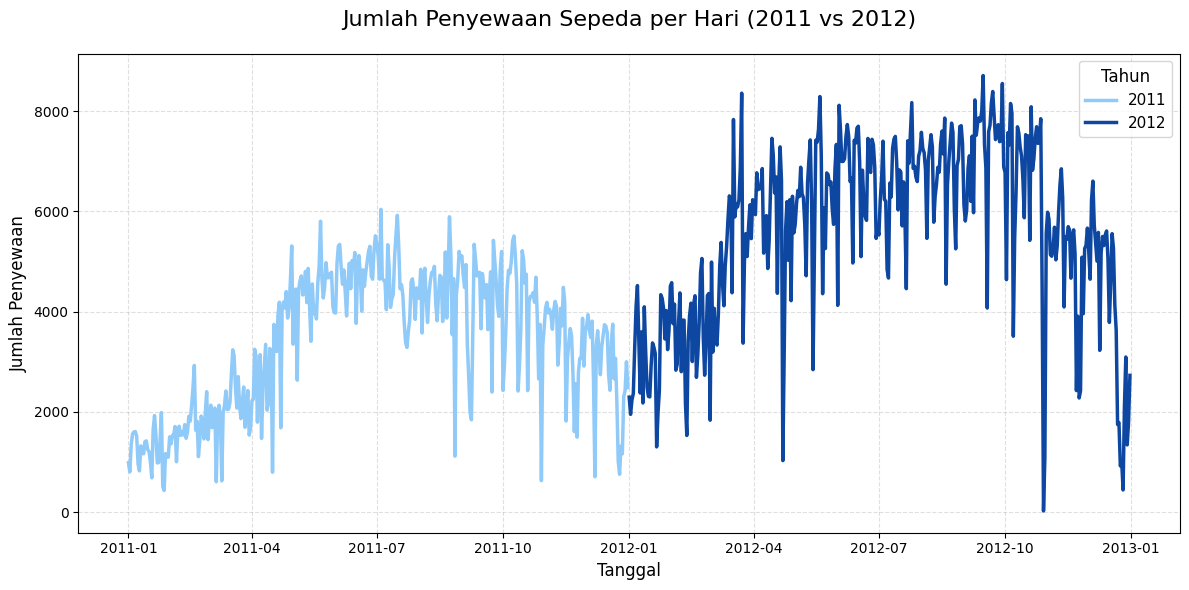

In [10]:
# Visualisasi line chart
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(
    data=bs_day_df,
    x='dteday',
    y='cnt',
    hue='yr',
    palette={0: '#90CAF9', 1: '#0D47A1'},
    linewidth=2.5
)
plt.title('Jumlah Penyewaan Sepeda per Hari (2011 vs 2012)',
          fontsize=16, pad=20)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

# Sesuaikan legend dengan tahun aktual
handles, labels = line_plot.get_legend_handles_labels()
line_plot.legend(
    handles=handles,
    labels=['2011', '2012'],
    title='Tahun',
    title_fontsize=12,
    fontsize=11
)

plt.tight_layout()
plt.show()

**Insight**:
Meskipun grafiknya cenderung berantakan, tapi terlihat polanya yg cenderung naik per tahun.

In [11]:
annual_increase = ((total_year[2012] - total_year[2011])/total_year[2011])*100
print(f"\nPresentase Kenaikan Antar Tahun: {annual_increase:.2f}%")


Presentase Kenaikan Antar Tahun: 64.88%


**Insight:**
- Terlihat bahwa terjadi peningkatan penyewaan dari tahun pertama ke tahun kedua dengan presentase 64.88%

In [12]:
# Mengecek korelasi antar variabel
relation = bs_day_df[['temp', 'hum', 'windspeed', 'cnt']].rename(columns={
    'temp':'Suhu',
    'hum':'Kelembapan',
    'windspeed':'Kecepatan Angin',
    'cnt':'Jumlah Penyewaan'
})
print("Korelasi antar variabel Suhu, Kelembapan, Kecepatan Angin dan Jumlah Penyewaan\n")
relation.corr(numeric_only=True)

Korelasi antar variabel Suhu, Kelembapan, Kecepatan Angin dan Jumlah Penyewaan



,Suhu,Kelembapan,Kecepatan Angin,Jumlah Penyewaan
Suhu,1.000000,0.126963,-0.157944,0.627494
Kelembapan,0.126963,1.000000,-0.248489,-0.100659
Kecepatan Angin,-0.157944,-0.248489,1.000000,-0.234545
Jumlah Penyewaan,0.627494,-0.100659,-0.234545,1.000000


**Insight:**
- Dapat terlihat bahwa dari ketiga variabel (suhu, kelembapan dan kecepatan angin), suhu merupakan variabel yang memiliki korelasi tertinggi dengan total penyewaan.
- Untuk kelembapan dan kecepatan angin memiliki korelasi yang lemah dengan penyewaan.
- Sementara korelasi antara suhu, kelembapan, dan kecepatan angin tidak saling memengaruhi secara signifikan.

In [13]:
print ("Pengelompokan Jumlah Penyewaan Berdasarkan Hari Libur dan Hari Biasa")

day_dict = {0: 'Weekend', 1: 'Weekday'}
total_day = bs_day_df.groupby('workingday')['cnt'].sum().rename_axis("Hari").rename(index=day_dict).rename('Jumlah Penyewaan')
total_day

Pengelompokan Jumlah Penyewaan Berdasarkan Hari Libur dan Hari Biasa


,Jumlah Penyewaan
Hari,
Weekend,1000269
Weekday,2292410


**Insight:**
- Berdasarkan data diatas, terlihat bahwa lebih banyak penyewaan di hari biasa (weekday) ketimbang hari libur.

In [14]:
print ("Pengelompokan Jumlah Penyewaan Berdasarkan Hari Libur Nasional")

# Menjumlahkan total penyewaan berdasarkan variabel holiday
holiday_dict = {0: 'Bukan Libur Nasional', 1: 'Libur Nasional'}
total_holiday = bs_day_df.groupby('holiday')['cnt'].sum().rename_axis("Hari").rename(index=holiday_dict).rename('Jumlah Penyewaan')
total_customers = bs_day_df['cnt'].sum()
total_holiday

Pengelompokan Jumlah Penyewaan Berdasarkan Hari Libur Nasional


,Jumlah Penyewaan
Hari,
Bukan Libur Nasional,3214244
Libur Nasional,78435


In [15]:
# Membuat presentase penyewaan
holiday_proportion = (total_holiday['Libur Nasional'] / total_customers) * 100
print(f"Proporsi Penyewaan pada Hari Libur Nasional: {holiday_proportion:.2f}%")

Proporsi Penyewaan pada Hari Libur Nasional: 2.38%


**Insight:**
- Terlihat bahwa pada hari libur nasional (mengacu pada data http://dchr.dc.gov/page/holiday-schedule), tidak banyak yang menyewa sepeda dengan dibuktikan presentase yang hanya 2.38% dari keseluruhan total penyewaan.

### Eksplore bs_hour_df

In [16]:
sum_hour = bs_hour_df.groupby('hr')['cnt'].sum().rename_axis("Hour").rename('Jumlah Penyewaan')
sum_hour = sum_hour.sort_values(ascending=False)

print("Jumlah Penyewaan pada Seluruh Waktu (Jam)")
sum_hour

Jumlah Penyewaan pada Seluruh Waktu (Jam)


,Jumlah Penyewaan
Hour,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


**Insight:**
- Data diatas menunjukkan urutan waktu mulai dari jam paling banyak penyewaan hingga jam paling sedikit penyewaan.

In [17]:
filter_spring = bs_hour_df[bs_hour_df['season'] == 1]
filter_summer = bs_hour_df[bs_hour_df['season'] == 2]
filter_fall = bs_hour_df[bs_hour_df['season'] == 3]
filter_winter = bs_hour_df[bs_hour_df['season'] == 4]

spring_max_hour = filter_spring.groupby('hr')['cnt'].sum().idxmax()
summer_max_hour = filter_summer.groupby('hr')['cnt'].sum().idxmax()
fall_max_hour = filter_fall.groupby('hr')['cnt'].sum().idxmax()
winter_max_hour = filter_winter.groupby('hr')['cnt'].sum().idxmax()

busiest_hour = pd.DataFrame({
    'Spring':[spring_max_hour],
    'Summer':[summer_max_hour],
    'Fall':[fall_max_hour],
    'Winter':[winter_max_hour]})

print("Daftar Waktu (Jam) Paling Banyak Penyewaan Sepeda Berdasarkan Musim 2011-2012")
busiest_hour.T

Daftar Waktu (Jam) Paling Banyak Penyewaan Sepeda Berdasarkan Musim 2011-2012


,0
Spring,17
Summer,17
Fall,17
Winter,17


**Insight:**
- Hal ini diperkuat dengan melihat jam tersibuk (paling banyak penyewaan) yang dilihat berdasarkan musim, yakni di pukul 17.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana suhu (temperature), kelembapan (humidity), dan kecepatan angin (windspeed) memengaruhi jumlah penyewaan sepeda?

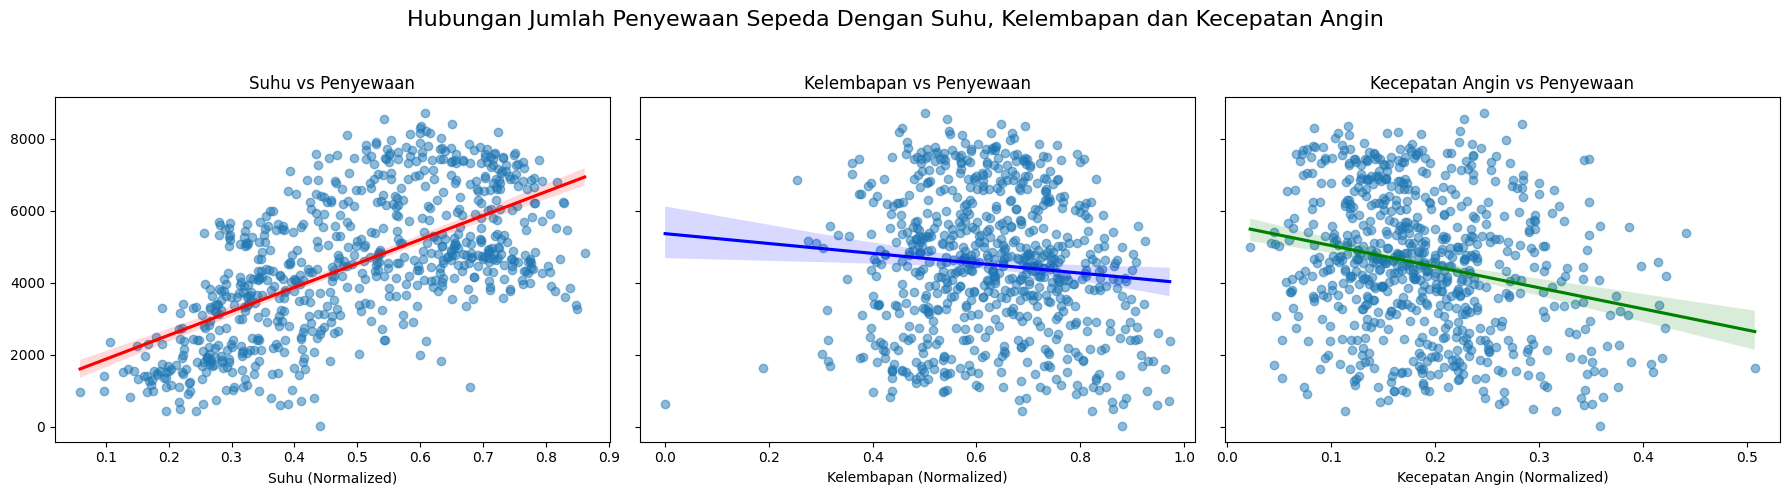

In [18]:
# Membuat Subplots
fig, ax1 = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Hubungan Jumlah Penyewaan Sepeda Dengan Suhu, Kelembapan dan Kecepatan Angin', fontsize=16)

# Temperature
sns.regplot(data=bs_day_df, x='temp', y='cnt', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax1[0])
ax1[0].set_title('Suhu vs Penyewaan')
ax1[0].set_xlabel('Suhu (Normalized)')
ax1[0].set_ylabel(None)

# Humidity
sns.regplot(data=bs_day_df, x='hum', y='cnt', scatter_kws={'alpha': 0.5}, line_kws={'color': 'blue'}, ax=ax1[1])
ax1[1].set_title('Kelembapan vs Penyewaan')
ax1[1].set_xlabel('Kelembapan (Normalized)')
ax1[1].set_ylabel(None)

# Windspeed
sns.regplot(data=bs_day_df, x='windspeed', y='cnt', scatter_kws={'alpha': 0.5}, line_kws={'color': 'green'}, ax=ax1[2])
ax1[2].set_title('Kecepatan Angin vs Penyewaan')
ax1[2].set_xlabel('Kecepatan Angin (Normalized)')
ax1[2].set_ylabel(None)


fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Insight:**
- Scatter plot temperature cenderung membentuk pola yang naik ke kanan.
Ini menunjukkan bahwa jumlah penyewaan sepeda meningkat seiring dengan suhu yang lebih hangat.
- Scatter plot humidity terlihat lebih acak. Hal ini menunjukkan bahwa kelembapan tidak terlalu berpengaruh pada jumlah penyewaan sepeda.
Namun, ada sedikit kecenderungan penyewaan terjadi pada kelembapan yang lebih tinggi.
- Scatter plot windspeed juga terlihat lebih acak, menandakan bahwa kecepatan angin tidak banyak memengaruhi jumlah penyewaan sepeda.
Namun, ada sedikit kecenderungan jumlah penyewaan lebih banyak terjadi saat kecepatan angin rendah.

### Pertanyaan 2: Apakah terdapat perbedaan jumlah penyewaan sepeda berdasarkan musim (spring, summer, fall, winter)?

<ipython-input-19-cd7f6c35a8c5>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


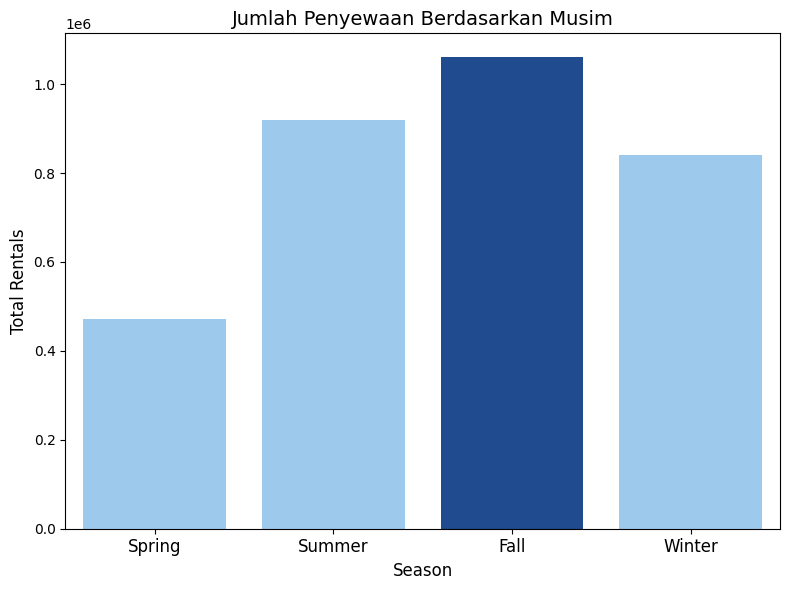

In [19]:
# Hitung total penyewaan per musim
season_data = bs_day_df.groupby('season')['cnt'].sum()

# Urutan musim dan label
season_order = [1, 2, 3, 4]
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']

# Warna
max_season = season_data.idxmax()
colors = ['#0D47A1' if season == max_season else '#90CAF9'
          for season in season_order]

# Visualisasi bar chart
plt.figure(figsize=(8, 6))
sns.barplot(
    x=season_order,
    y=season_data[season_order],  # Ambil data sesuai urutan
    palette=colors
)
plt.title('Jumlah Penyewaan Berdasarkan Musim', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=season_labels, fontsize=12)
plt.tight_layout()
plt.show()

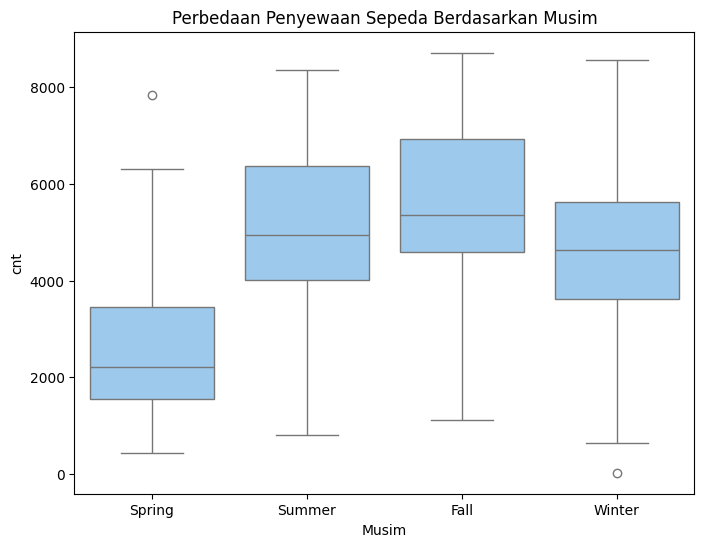

In [20]:
# Boxplot jumlah penyewaan sepeda berdasarkan musim
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='season',
    y='cnt',
    data=bs_day_df,
    color="#90CAF9"
)
plt.title('Perbedaan Penyewaan Sepeda Berdasarkan Musim')
plt.xticks(ticks=[0,1,2,3], labels=['Spring','Summer','Fall','Winter'])
plt.xlabel('Musim')
plt.show()

In [21]:
# Melihat nilai kemiringan per season
# Spring
spring = bs_day_df[bs_day_df['season'] == 1]['cnt']
skew_spring = skew(spring)

# Summer
summer = bs_day_df[bs_day_df['season'] == 2]['cnt']
skew_summer = skew(summer)

# Fall
fall = bs_day_df[bs_day_df['season'] == 3]['cnt']
skew_fall = skew(fall)

# Winter
winter = bs_day_df[bs_day_df['season'] == 4]['cnt']
skew_winter = skew(winter)

all_skewness = pd.DataFrame({
    'Spring Skewness': [skew_spring],
    'Summer Skewness': [skew_summer],
    'Fall Skewness': [skew_fall],
    'Winter Skewness': [skew_winter]})

print("Nilai Kemiringan Data Setiap Musim\n")
all_skewness

Nilai Kemiringan Data Setiap Musim



,Spring Skewness,Summer Skewness,Fall Skewness,Winter Skewness
0,0.87797,-0.261461,-0.095464,0.091741


In [22]:
season_dict = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
avg_season_temp = bs_day_df.groupby('season')['temp'].mean().rename(index=season_dict).rename('Suhu').rename_axis('Season')
avg_season_temp = avg_season_temp * 41
avg_season_temp

,Suhu
Season,
Spring,12.207650
Summer,22.320611
Fall,28.958682
Winter,17.339148


In [23]:
# Filter data dengan weathersit=3 dan groupby season
result = (
    bs_hour_df[bs_hour_df['weathersit'] == 3]
    .groupby('season')
    .size()
    .reset_index(name='count_weather_3')
    .sort_values('count_weather_3', ascending=False)
)

# Mapping angka season ke nama musim
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
result = result.rename(columns={
    'season': 'Musim',
    'count_weather_3': 'Jumlah Hari Hujan/Salju'
})

result['Musim'] = result['Musim'].map(season_map)

print("\nFrekuensi Hari dengan Hujan/Salju per Musim:")
result


Frekuensi Hari dengan Hujan/Salju per Musim:


,Musim,Jumlah Hari Hujan/Salju
1,Summer,406
3,Winter,375
0,Spring,369
2,Fall,269


**Insight:**
- Musim semi (Spring): Penyewaan sepeda di musim semi memiliki median terendah di antara semua musim, menunjukkan bahwa sebagian besar hari memiliki jumlah peminjaman rendah. Namun, sebaran data cukup lebar, artinya ada variasi besar antar hari, dan letak median yang lebih dekat ke batas bawah kotak menunjukkan distribusi condong ke atas. Terdapat juga beberapa outlier positif—hari-hari dengan lonjakan penyewaan yang jauh di atas normal—yang mengindikasikan potensi penggunaan tinggi di hari tertentu meskipun umumnya rendah. Disini cukup banyak terjadi hujan, namun bukan musim dengan hujan terbanyak (posisi 3).

- Musim panas (Summer): Penyewaan di musim panas menunjukkan median yang tinggi, mendekati fall, mencerminkan tingginya permintaan selama periode ini. Meski begitu, sebaran datanya tetap lebar, menandakan variabilitas antar hari masih besar, dan posisi median yang sedikit ke bawah mengindikasikan bahwa data sedikit condong ke atas. Terdapat beberapa outlier di sisi atas, menguatkan adanya hari-hari dengan lonjakan aktivitas yang tidak biasa. Disini cukup banyak terjadi hujan, dan merupakan musim dengan hujan terbanyak (tapi jumlah hitungan hujan bisa dalam beberapa hari 1 kali atau 1 hari beberapa kali hujan).

- Musim gugur (Fall): Musim gugur adalah musim dengan penyewaan tertinggi secara konsisten, ditunjukkan oleh median paling tinggi dan distribusi yang cukup simetris (median hampir di tengah kotak). Meskipun variasi antar harinya tetap terlihat dari lebar kotak, jumlah outlier lebih sedikit, yang menunjukkan bahwa penggunaan sepeda lebih stabil dan terkontrol dibandingkan musim lain. Disini cukup banyak terjadi hujan, tapi menjadi musim dengan hujan paling sedikit.

- Musim dingin (Winter): Di musim dingin, penyewaan sepeda menurun secara umum, meskipun median sedikit lebih tinggi dibanding spring. Sebaran data tetap cukup luas, dengan posisi median mendekati tengah kotak, menunjukkan distribusi yang relatif simetris. Namun, outlier tetap muncul di kedua sisi, yang berarti ada hari-hari dengan penggunaan jauh lebih tinggi maupun jauh lebih rendah dari mayoritas. Disini cukup banyak terjadi hujan, namun bukan musim dengan hujan terbanyak (posisi 2).



### Pertanyaan 3: Bagaimana perbedaan pola penggunaan antara pengguna casual dan registered?

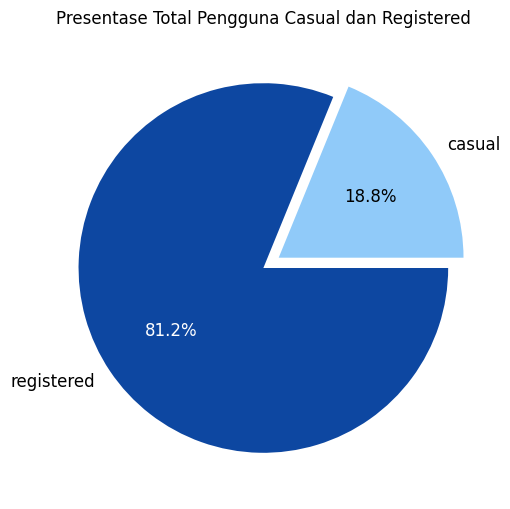

In [24]:
# Presentase pengguna casual dan registered

avg_users = bs_day_df[['casual', 'registered']].sum()
colors = ['#90CAF9', '#0D47A1']

# visualisasi pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    avg_users,
    labels=avg_users.index,
    colors=colors,
    autopct=lambda p: f'{p:.1f}%',
    explode=(0.1, 0),
    textprops={'fontsize': 12}
)

# Sesuaikan Warna teks
for i, autotext in enumerate(autotexts):
    autotext.set_color('black' if i == 0 else 'white')

plt.title('Presentase Total Pengguna Casual dan Registered', pad=10, fontsize=12)
plt.show()

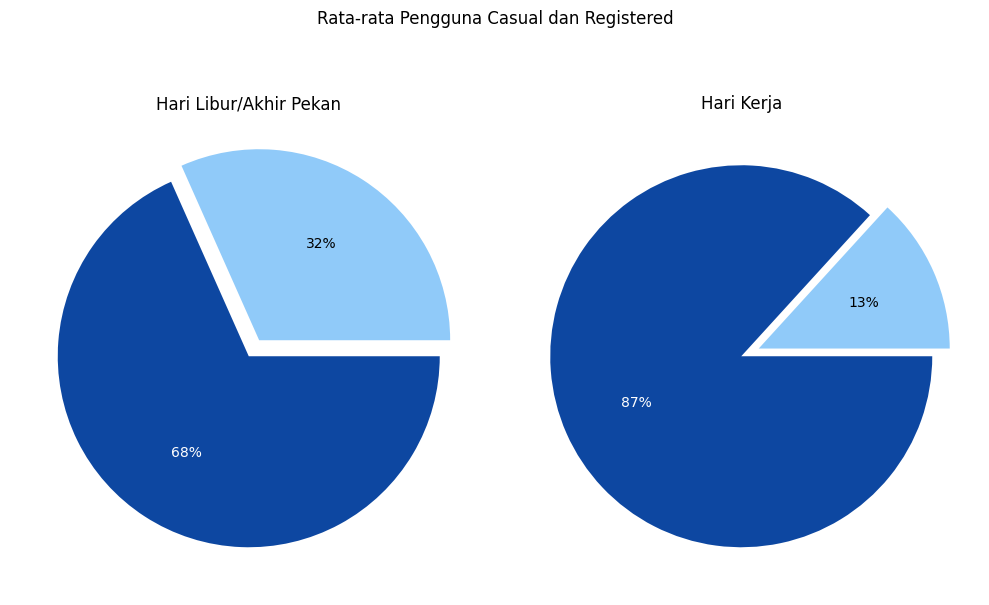

In [25]:
# Filter Data
weekend_holiday = bs_day_df[(bs_day_df['holiday'] == 1) | (bs_day_df['workingday'] == 0)]
working_day = bs_day_df[bs_day_df['workingday'] == 1]

# Mengatur ukuran gambar dan warna
plt.figure(figsize=(10,6))
colors = ['#90CAF9', '#0D47A1']

# Visualisasi pie chart
for i, (data, title) in enumerate(zip(
    [weekend_holiday, working_day],
    ['Hari Libur/Akhir Pekan', 'Hari Kerja']
)):
    plt.subplot(1,2,i+1)
    wedges, _, autotexts = plt.pie(
        data[['casual','registered']].mean(),
        colors=colors,
        autopct=lambda p: f'{p:.0f}%',
        explode=(0.1,0)
    )
    plt.title(title)
    [autotext.set_color('white' if float(autotext.get_text()[:-1])>50 else 'black')
     for autotext in autotexts]

plt.suptitle('Rata-rata Pengguna Casual dan Registered', y=1.05)
plt.tight_layout()
plt.show()

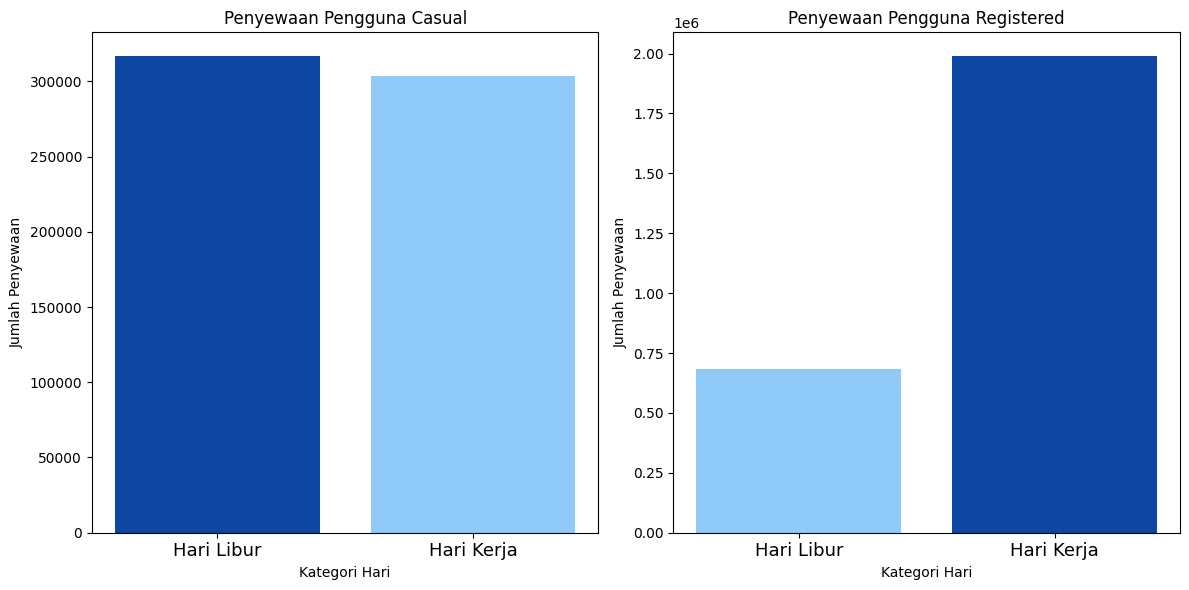

In [26]:
# Preparasi data  berdasarkan oengguna casual dan registered
data = {
    'Casual': {
        'Hari Libur': weekend_holiday['casual'].sum(),
        'Hari Kerja': working_day['casual'].sum()
    },
    'Registered': {
        'Hari Libur': weekend_holiday['registered'].sum(),
        'Hari Kerja': working_day['registered'].sum()
    }
}

# Visualisasi bar chart
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
categories = ['Hari Libur', 'Hari Kerja']

for i, (user_type, values) in enumerate(data.items()):
    colors = ['#0D47A1' if values['Hari Libur'] > values['Hari Kerja'] else '#90CAF9',
              '#90CAF9' if values['Hari Libur'] > values['Hari Kerja'] else '#0D47A1']

    ax[i].bar(categories, list(values.values()), color=colors)
    ax[i].set_title(f'Penyewaan Pengguna {user_type}')
    ax[i].set_ylabel('Jumlah Penyewaan')
    ax[i].set_xlabel('Kategori Hari')
    ax[i].tick_params(axis='x', labelsize=13)

plt.tight_layout()
plt.show()

**Insight:**
- Dapat dilihat bahwa antara pengguna casual dan registered memiliki perbedaan yang cukup jauh. Hal ini menandakan sebagian besar pengguna adalah dari pengguna registered.
- Pada hari libur, memang total pengguna casual sedikit lebih banyak dibandingkan pada hari kerja, namun tetap pengguna registered yang mendominasi.
- Pengguna casual lebih banyak melakukan penyewaan sepeda disaat hari libur (baik itu libur nasional maupun akhir pekan), sedangkan pengguna registered jauh lebih banyak melakukan penyewaan sepeda saat hari kerja.

### Pertanyaan 4: Apakah distribusi penyewaan sepeda merata sepanjang tahun atau ada bulan-bulan tertentu dengan permintaan rendah?

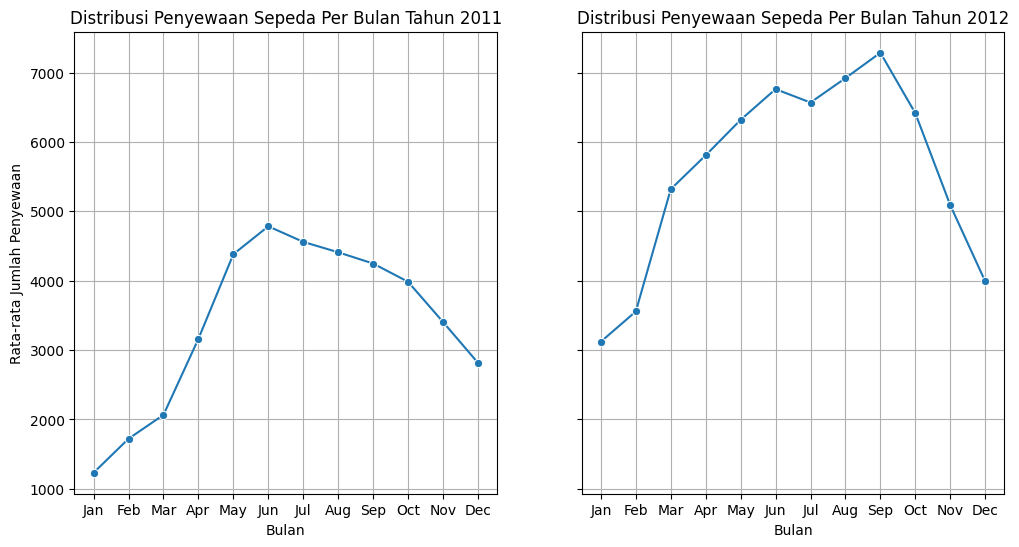

In [27]:
# Rata-rata penyewaan per bulan
first_year = bs_day_df[bs_day_df['yr'] == 0]
second_year = bs_day_df[bs_day_df['yr'] == 1]

avg_mnth_first = first_year.groupby('mnth')['cnt'].mean()
avg_mnth_second = second_year.groupby('mnth')['cnt'].mean()

# Visualisasi line plot
fig, ax3 = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# 2011
sns.lineplot(x=avg_mnth_first.index, y=avg_mnth_first.values, marker='o', ax=ax3[0])
ax3[0].set_title('Distribusi Penyewaan Sepeda Per Bulan Tahun 2011')
ax3[0].set_xlabel('Bulan')
ax3[0].set_ylabel('Rata-rata Jumlah Penyewaan')
ax3[0].set_xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax3[0].grid(True)

# 2012
sns.lineplot(x=avg_mnth_second.index, y=avg_mnth_second.values, marker='o', ax=ax3[1])
ax3[1].set_title('Distribusi Penyewaan Sepeda Per Bulan Tahun 2012')
ax3[1].set_xlabel('Bulan')
ax3[1].set_xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax3[1].grid(True)

plt.show()

In [28]:
holiday_month_count = bs_day_df[bs_day_df['holiday'] == 1].groupby('season').size().reset_index(name='count_holiday')
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
holiday_month_count = holiday_month_count.rename(columns={
    'season': 'Musim',
    'count_holiday': 'Hari Libur Nasional'
})
holiday_month_count['Musim']=holiday_month_count['Musim'].map(season_map)
holiday_month_count

,Musim,Hari Libur Nasional
0,Spring,7
1,Summer,4
2,Fall,4
3,Winter,6


**Insight:**
- Dapat dilihat bahwa terjadi kenaikan yang cukup signifikan dari tahun pertama ke tahun kedua, meskipun awal tahun 2011, dimulai dengan penyewaan yang cukup rendah dibandingkan penyewaan setelahnya.
- Pada Tahun pertama, terjadi kenaikan yang  cukup stabil pada bulan Januari - Juni, lalu penurunan yang cukup stabil pada bulan Juli - Desember.
- Pada Tahun kedua, hampir mirip seperti tahun pertama namun di bulan Agustus - September terjadi kenaikan dan kembali menurun dari bulan Oktober - Desember. Bulan september merupakan transisi dari musim gugur ke musim dingin. Ditahun ini, penurunan terjadi saat musim gugur.
- Walaupun di tahun pertama mengalami penurunan, jika dijumlahkan secara keseluruhan, musim gugur tetap menjadi yang tertinggi karena nilai di tahun kedua cukup tinggi untuk menutupi penurunan bulan sebelumnya.

### Pertanyaan 5: Kapan waktu (jam) paling sering dan jarang terjadi transaksi penyewaan sepeda?

<ipython-input-29-e77167787089>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hour.index, y=top_hour.values, ax=ax4[0], palette=colors1)
<ipython-input-29-e77167787089>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_hour.index, y=bottom_hour.values, ax=ax4[1], palette=colors2)


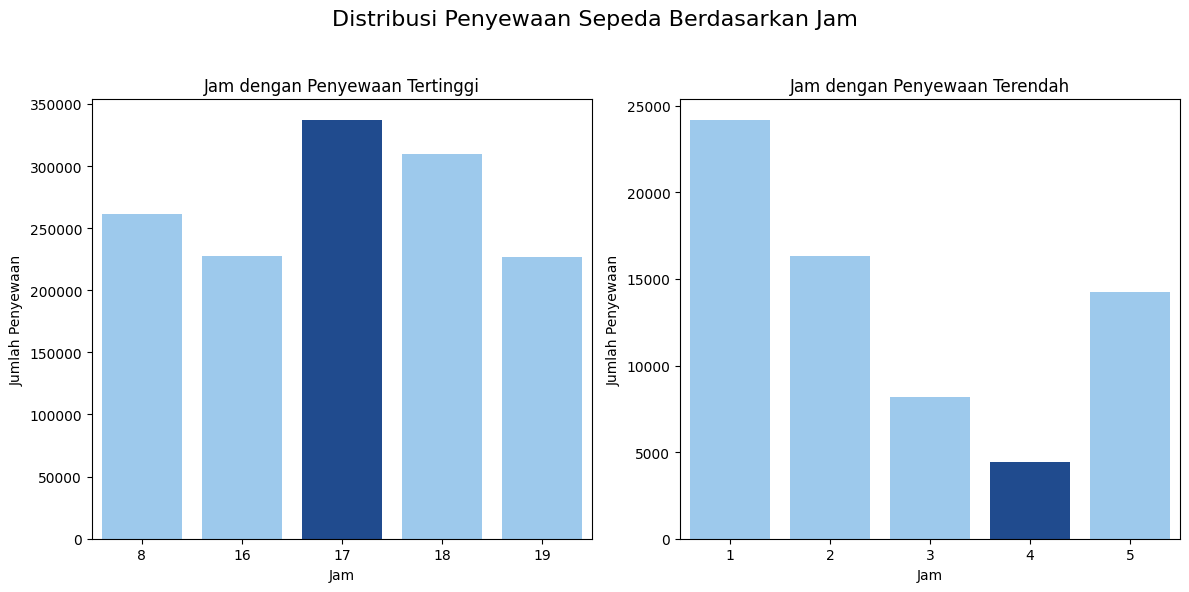

In [29]:
# Mengambil 5 data jam dengan jumlah penyewaan tertinggi dan terendah
top_hour = sum_hour.head(5)
bottom_hour = sum_hour.tail(5)

# Mengatur data sesuai index hour
top = top_hour.sort_index(ascending=True)
bottom = bottom_hour.sort_index(ascending=True)

# Mendapatkan nilai maks dan min
top_index = top_hour.idxmax()
bottom_index = bottom_hour.idxmin()
#'#90CAF9', '#0D47A1'

# Menentukan warna
colors1 = ['#0D47A1' if i == top_index else '#90CAF9' for i in top.index]
colors2 = ['#0D47A1' if i == bottom_index else '#90CAF9' for i in bottom.index]

# Membuat subplot
fig, ax4 = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Distribusi Penyewaan Sepeda Berdasarkan Jam', fontsize=16)

# Plot untuk top_hour
sns.barplot(x=top_hour.index, y=top_hour.values, ax=ax4[0], palette=colors1)
ax4[0].set_title('Jam dengan Penyewaan Tertinggi')
ax4[0].set_xlabel('Jam')
ax4[0].set_ylabel('Jumlah Penyewaan')

# Plot untuk bottom_hour
sns.barplot(x=bottom_hour.index, y=bottom_hour.values, ax=ax4[1], palette=colors2)
ax4[1].set_title('Jam dengan Penyewaan Terendah')
ax4[1].set_xlabel('Jam')
ax4[1].set_ylabel('Jumlah Penyewaan')

# Menyesuaikan tata letak
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Insight:**
- Pada visualisasi diatas, pada penyewaan tertinggi itu ada di pukul 17:00, disusul oleh pukul 18:00.
- Sementara penyewaan terendah itu ada di pukul 4:00, disusul oleh pukul 3:00.

## Analisis Lanjutan (Opsional)

### Clustering

**Tujuan:**
- Dilakukannya analisa lanjutan ini ialah mendapatkan insight baru yang nantinya akan memperkuat keterangan dari hasil yang sudah digali pada saat menjawab pertanyaan bisnis.
- Analisa ini dilakukan lebih mendalam dibanding tahap sebelumnya, dengan menggunakan metode clustering.

In [30]:
# Manual Grouping berdasarkan Humidity

def classify_hum(hum):
    if hum < 0.30:
        return 'Too Dry'
    elif 0.30 <= hum <= 0.60:
        return 'Ideal'
    else :
        return 'Too Moist'

bs_day_df['classify_hum'] = bs_day_df['hum'].apply(classify_hum)
bs_hour_df['classify_hum'] = bs_hour_df['hum'].apply(classify_hum)


In [31]:
# Manual Grouping berdasarkan Kecepatan Angin

def classify_wind(wind):
    if wind < 0.015:
        return 'Calm'
    elif 0.015 < wind <= 0.075:
        return 'Light Air'
    elif 0.075 < wind <= 0.1642:
        return 'Light Breeze'
    elif 0.1642 < wind <= 0.284:
        return 'Gentle Breeze'
    elif 0.284 < wind <= 0.418:
        return 'Moderate Breeze'
    elif 0.418 < wind <= 0.567:
        return 'Fresh Breeze'
    else:
        return 'Strong Breeze'

bs_day_df['classify_wind'] = bs_day_df['windspeed'].apply(classify_wind)
bs_hour_df['classify_wind'] = bs_hour_df['windspeed'].apply(classify_wind)

In [32]:
# Manual Grouping berdasarkan Suhu

def classify_temp(temp):
    if temp < 0.122:
        return 'Very Cold'
    elif 0.122 < temp <= 0.293:
        return 'Cold'
    elif 0.293 < temp <= 0.439:
        return 'Cool'
    elif 0.439 < temp <= 0.585:
        return 'Moderate'
    elif 0.585 < temp <= 0.732:
        return 'Warm'
    elif 0.732 < temp <= 0.854:
        return 'Hot'
    else :
        return 'Very Hot'

bs_day_df['classify_temp'] = bs_day_df['temp'].apply(classify_temp)
bs_hour_df['classify_temp'] = bs_hour_df['temp'].apply(classify_temp)

**Insight:**
- Melakukan beberapa manual grouping berdasarkan pengelompokan kelembapan, kecepatan angin, dan suhu.

<ipython-input-33-f742bd1be084>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=class_hum_cnt, x='classify_hum', y='cnt', palette=colors, order=custom_order)


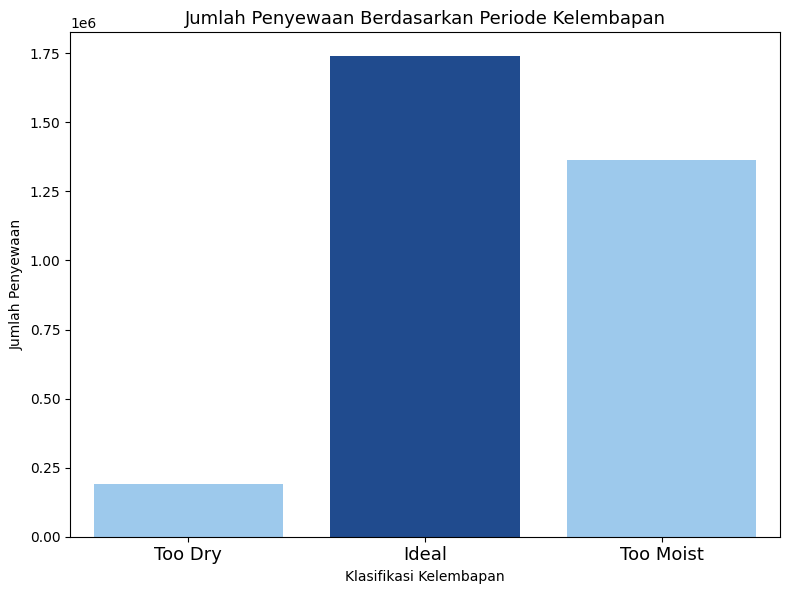

In [33]:
# Hitung total penyewaan per kelembapan
class_hum_cnt = bs_hour_df.groupby("classify_hum")["cnt"].sum().reset_index()

# Cari musim dengan rata-rata tertinggi
max_hum = class_hum_cnt.loc[class_hum_cnt['cnt'].idxmax(), 'classify_hum']

# Urutkan sesuai order yang diinginkan
custom_order = ['Too Dry', 'Ideal', 'Too Moist']
class_hum_cnt['classify_hum'] = pd.Categorical(class_hum_cnt['classify_hum'], categories=custom_order, ordered=True)
class_hum_cnt = class_hum_cnt.sort_values('classify_hum')

# Tetapkan warna: warna khusus untuk yang tertinggi
colors = ['#90CAF9' if hum != max_hum else '#0D47A1' for hum in class_hum_cnt['classify_hum']]

# Visualisasikan bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=class_hum_cnt, x='classify_hum', y='cnt', palette=colors, order=custom_order)

plt.title('Jumlah Penyewaan Berdasarkan Periode Kelembapan', fontsize=13)
plt.xlabel('Klasifikasi Kelembapan')
plt.ylabel('Jumlah Penyewaan')
plt.tight_layout()
plt.xticks(fontsize=13)
plt.show()

**Insight:**
- Dari data diatas, jumlah penyewaan terbanyak terjadi saat kelebaban ideal.

<ipython-input-34-c5d3e5efe999>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


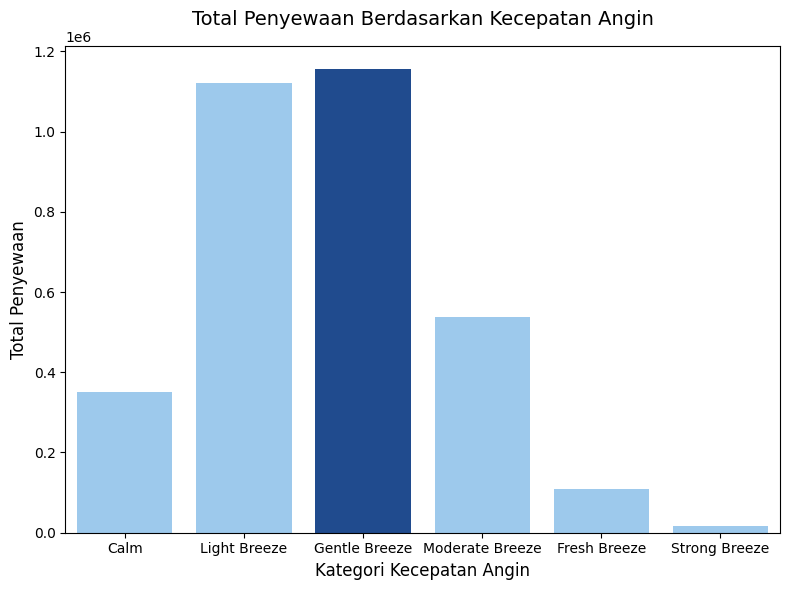

In [34]:
# Hitung total penyewaan dan urutkan
wind_order = ['Calm', 'Light Breeze', 'Gentle Breeze', 'Moderate Breeze', 'Fresh Breeze', 'Strong Breeze']
wind_data = bs_hour_df.groupby('classify_wind')['cnt'].sum().reindex(wind_order).reset_index()

# Cari nilai maksimum
max_value = wind_data['cnt'].max()

# 3. Buat palette warna
palette = {wind: '#0D47A1' if cnt == max_value else '#90CAF9'
           for wind, cnt in zip(wind_data['classify_wind'], wind_data['cnt'])}

# Visualisasi bar chart
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=wind_data,
    x='classify_wind',
    y='cnt',
    palette=palette,
    order=wind_order
)
plt.title('Total Penyewaan Berdasarkan Kecepatan Angin', fontsize=14, pad=15)
plt.xlabel('Kategori Kecepatan Angin', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)
plt.tight_layout()
plt.show()

**Insight:**
- Dari data diatas, jumlah penyewaan terbanyak terjadi saat kecepatan angin yang pelan.

<ipython-input-35-c9a17790bff8>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=class_temp_cnt, x='classify_temp', y='cnt', palette=colors, order=custom_order)


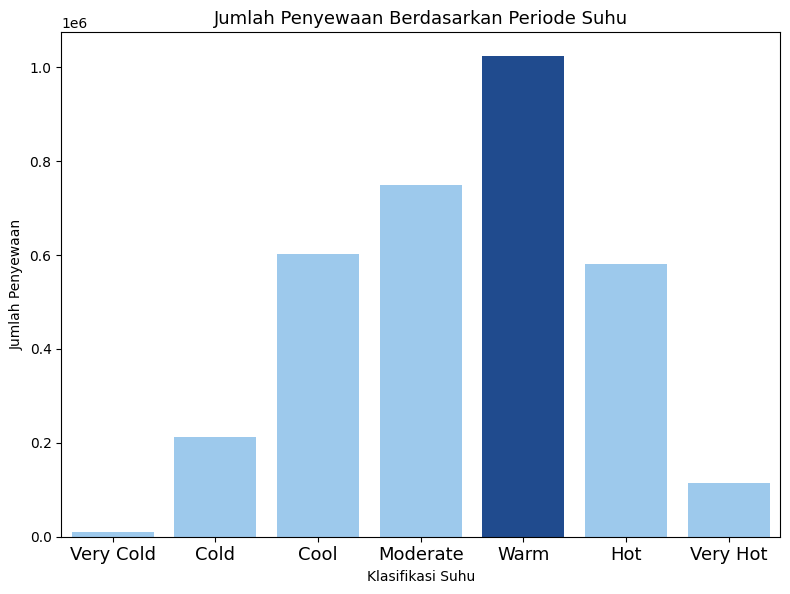

In [35]:
# Hitung total penyewaan per suhu
class_temp_cnt = bs_hour_df.groupby("classify_temp")["cnt"].sum().reset_index()

# Cari musim dengan rata-rata tertinggi
max_temp = class_temp_cnt.loc[class_temp_cnt['cnt'].idxmax(), 'classify_temp']

# Urutkan sesuai order yang diinginkan
custom_order = ['Very Cold', 'Cold', 'Cool', 'Moderate', 'Warm', 'Hot', 'Very Hot']
class_temp_cnt['classify_temp'] = pd.Categorical(class_temp_cnt['classify_temp'], categories=custom_order, ordered=True)
class_temp_cnt = class_temp_cnt.sort_values('classify_temp')

# Tetapkan warna: warna khusus untuk yang tertinggi
colors = ['#90CAF9' if temp != max_temp else '#0D47A1' for temp in class_temp_cnt['classify_temp']]

# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=class_temp_cnt, x='classify_temp', y='cnt', palette=colors, order=custom_order)

plt.title('Jumlah Penyewaan Berdasarkan Periode Suhu', fontsize=13)
plt.xlabel('Klasifikasi Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.tight_layout()
plt.xticks(fontsize=13)
plt.show()

**Insight:**
- Dari data diatas, jumlah penyewaan terbanyak terjadi saat suhu hangat.

In [36]:
weathersit_dict = {1: 'Clear/Cloudy', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
total_weathersit_temp = bs_hour_df.groupby(by='weathersit').agg({
    'temp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean',
    'cnt': 'sum'
}).rename(index=weathersit_dict).rename_axis('Weather Situation')

total_weathersit_temp['temp'] *= 41
total_weathersit_temp['hum'] *= 100
total_weathersit_temp['windspeed'] *= 67

total_weathersit_temp = total_weathersit_temp.rename(columns={
    'temp': 'Suhu',
    'hum': 'Kelembapan',
    'windspeed': 'Kecepatan Angin',
    'cnt': 'Jumlah Penyewaan'
})
total_weathersit_temp

,Suhu,Kelembapan,Kecepatan Angin,Jumlah Penyewaan
Weather Situation,,,,
Clear/Cloudy,20.953217,57.374660,12.767059,2338173
Mist/Cloudy,19.452262,69.880722,12.058220,795952
Light Snow/Rain,18.724200,82.763214,14.661253,158331
Heavy Rain/Snow,7.653333,88.333333,13.668000,223


**Insight:**
- Sebelumnya dilihat bahwa cuaca yang paling banyak terjadi penyewaan adalah disaat cuaca cerah berawan (Clear/Cloudy). Dilihat dari tabel perbandingan cuaca dengan suhu, di cuaca tersebut rata - rata suhu sekitar 20.953°C, Kelembapan di angka 57.375 % dan Kecepatan angin di angka 12.767 km/h.
- Sementara cuaca yang paling dihindari ialah hujan deras atau bersalju, dilihat dari jumlah penyewaan yang paling sedikit.

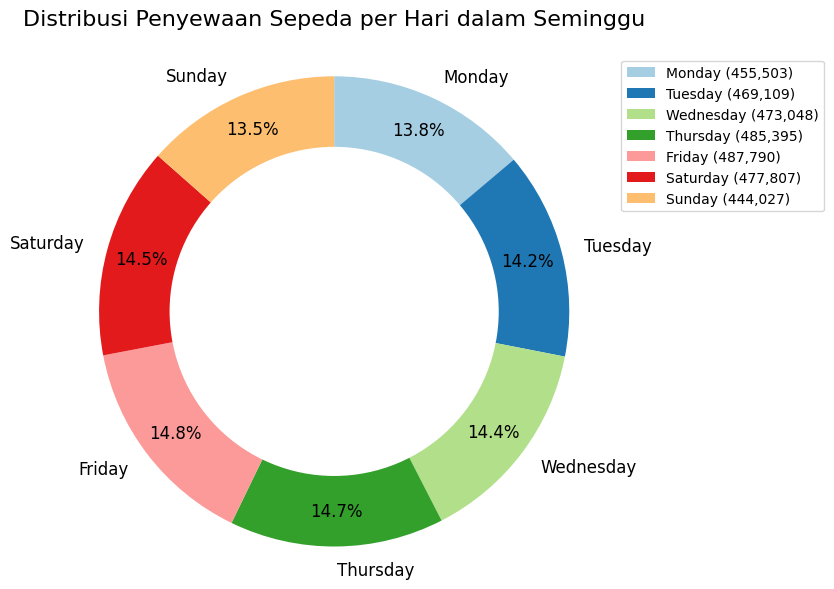

In [37]:
# Persiapan Data
day_of_week_dict = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday',
                    3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
total_day_of_week = bs_day_df.groupby('weekday')['cnt'].sum().rename(index=day_of_week_dict)

# Susun hari (Monday - Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_day_of_week = total_day_of_week.reindex(day_order)

# Visualiasi pie chart
plt.figure(figsize=(8, 6))
colors = plt.cm.Paired.colors[:len(total_day_of_week)]
patches, texts, autotexts = plt.pie(
    total_day_of_week,
    labels=total_day_of_week.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    pctdistance=0.85,
    textprops={'fontsize': 12}
)

for autotext in autotexts:
    autotext.set_color('black')

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribusi Penyewaan Sepeda per Hari dalam Seminggu',
          fontsize=16, pad=20,)
legend_labels = [f'{label} ({value:,})' for label, value in zip(total_day_of_week.index, total_day_of_week)]
plt.legend(
    patches,
    legend_labels,
    loc='lower left',
    bbox_to_anchor=(1, 0.68),
    fontsize=10
)

plt.tight_layout()
plt.show()

**Insight:**
- Untuk pengelompokan berdasarkan hari dalam seminggu, hasilnya berkisar diatas angka 400000 penyewaan pada semua hari (perbedaan yang tidak telalu signifikan antar hari) dan hari jumat menjadi hari dengan penyewaan terbanyak, dan memiliki selisih 2395 penyewaan dengan hari kamis (kedua terbanyak) dan selisih 43763 penyewaan dengan hari minggu (penyewaan paling sedikit).

## Kesimpulan

### Kesimpulan

Secara keseluruhan, suhu menjadi faktor cuaca yang paling memengaruhi jumlah penyewaan sepeda, sementara kelembapan dan kecepatan angin hanya memiliki pengaruh kecil. Musim gugur mencatat jumlah penyewaan tertinggi dan paling stabil, diikuti musim panas yang juga tinggi meski sering hujan. Musim dingin memiliki aktivitas yang cukup beragam, sementara musim semi jadi yang paling sepi meski kadang muncul lonjakan. Dari sisi pengguna, mayoritas merupakan pengguna registered yang lebih aktif saat hari kerja, sedangkan pengguna casual lebih sering menyewa saat hari libur.

Dilihat dari tren tahunan, penyewaan sepeda meningkat signifikan dari tahun pertama ke tahun kedua. Tahun pertama menunjukkan pola kenaikan dari Januari hingga Juni lalu menurun, dan pola serupa terlihat di tahun kedua dengan lonjakan tambahan pada Agustus–September. Meski terjadi penurunan di musim gugur tahun kedua, total penyewaan di musim ini tetap tertinggi secara keseluruhan. Secara waktu, puncak penyewaan terjadi pada sore hari pukul 17:00–18:00, sedangkan paling sepi terjadi dini hari pukul 3:00–4:00.


### Pola Pengguna

Pengguna sepeda didominasi oleh pengguna terdaftar (registered), aktif di hari kerja terutama sore hari (sekitar pukul 17:00–18:00), kemungkinan besar untuk keperluan pulang kerja. Pengguna casual lebih sedikit dan lebih aktif di akhir pekan atau hari libur, terutama saat musim gugur dan musim panas. Cuaca ideal untuk penyewaan adalah cerah berawan, suhu sekitar 21°C, kelembapan sedang, dan angin ringan. Penyewaan menurun saat cuaca ekstrem seperti hujan atau salju. Pola ini mengindikasikan bahwa mayoritas pengguna adalah komuter rutin yang sensitif terhadap cuaca dan waktu sibuk.


###**Catatan: Musim semi dengan penyewaan terendah (lebih rendah dari musim dingin)**


Musim semi (Januari–Maret dalam dataset) memiliki jumlah penyewaan lebih rendah dibanding musim dingin, karena beberapa faktor:
- Di awal 2011, penyewaan masih sangat rendah—kemungkinan karena bisnis masih baru merintis atau baru aktif kembali.
- Suhu di musim ini masih cukup rendah karena transisi dari musim dingin.
- Musim semi memiliki banyak libur nasional, sehingga pengguna registered yang biasanya aktif saat kerja, justru tidak menggunakan sepeda.
- Musim dingin mencatat angka lebih tinggi karena mungkin sudah mulai ada basis pengguna tetap. Selain itu, musim semi di awal 2012 menunjukkan peningkatan dibanding musim dingin 2011, mengindikasikan pertumbuhan penyewaan dari waktu ke waktu.

##Insight Bisnis

Data tahun 2011–2012 menunjukkan pola penggunaan sepeda yang cenderung stabil, seperti dominasi pengguna terdaftar, jam sibuk di sore hari, serta tingginya penggunaan saat cuaca cerah dan suhu hangat (sekitar 24-30°C). Meskipun data historis, pola ini kemungkinan masih relevan, terutama di sistem bike-sharing perkotaan modern. Maka, strategi disusun dengan menyesuaikan konteks era 2020-an.

1. **Fokus pada Pengguna Terdaftar:** Dominasi pengguna registered menunjukkan pentingnya strategi retensi seperti langganan fleksibel dan program loyalitas (sistem poin di aplikasi, dan lain-lain).
2. **Optimasi Berdasarkan Cuaca & Musim:** Gunakan API cuaca untuk menyesuaikan pasokan sepeda dan promosi musiman.
3. **Tingkatkan Aktifkan Pengguna Casual Lewat Gaya Hidup:** Kampanye liburan, kolaborasi tempat wisata, serta konten media sosial bisa meningkatkan keterlibatan.
4. **Perluasan Lokasi Strategis:** Tambah stasiun di titik dengan potensi tinggi seperti kampus, area wisata, dan pusat transit, berdasarkan tren mobilitas terbaru.
